In [9]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=20000)
pd.options.display.max_columns = None

from itertools import product

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import seaborn as sns
sns.set()

import re

# Vista rápida

In [3]:
inai = pd.read_parquet('../data/inai.parquet')
inai.sample(5)

folio     fecha_solicitud  \
1101614  1222600006614 2014-01-21 10:02:21   
1351498  1151500003719 2019-05-26 15:53:07   
12961    1857500073518 2018-08-06 11:26:02   
183947     64101668615 2015-07-28 10:39:35   
296544   1114100064617 2017-08-01 18:19:56   

                                                estatus medio_entrada  \
1101614  Desechada por falta de respuesta del ciudadano        Manual   
1351498                                       Terminada   Electrónica   
12961                                         Terminada   Electrónica   
183947                                        Terminada   Electrónica   
296544                                        Terminada   Electrónica   

              tipo_solicitud  \
1101614     Datos Personales   
1351498  Información Pública   
12961    Información Pública   
183947   Información Pública   
296544   Información Pública   

                                               descripcion  \
1101614                              DESCRIPCIÓN SOLICITUD   
1351498  1. -No. 133411  del año 2010  con el nombre de...   
12961    referente al contrato de obra 420834809 se sol...   
183947   Deseo saber si en los hospitales del IMSS  est...   
296544   Buenas tardes. Solicito atentamente  a quien c...   

                                                     otros archivo_adjunto  \
1101614                                        OTROS DATOS             nan   
1351498  Apoyos otorgados por el CONACYT a la empresa N...             nan   
12961    GERENCIA DE PROYECTOS DE INFRAESTRUCTURA TERRE...             nan   
183947   CIRUGÍAS ESTÉTICAS IMSS  FUNDAMENTO Y PROGRAMA...             nan   
296544                                                 nan             nan   

                              medio_entrega fecha_limite  \
1101614                        Copia Simple          NaT   
1351498      Entrega por Internet en la PNT   2019-06-24   
12961        Entrega por Internet en la PNT   2018-10-08   
183947   Entrega por Internet en el INFOMEX   2015-08-31   
296544       Entrega por Internet en la PNT   2017-08-30   

                                           respuesta  \
1101614       Requerimiento de información adicional   
1351498  No es de competencia de la unidad de enlace   
12961          Notificación lugar y fecha de entrega   
183947   Entrega de información en medio electrónico   
296544   La información está disponible públicamente   

                                           texto_respuesta  \
1101614                                    TEXTO RESPUESTA   
1351498  @El fideicomiso se encuentra en proceso de ext...   
12961    Lugar para obtener la información:Av. Laguna d...   
183947                Favor de consultar archivo adjunto     
296544   Direcci&oacute;n de Internet en donde se encue...   

                                         archivo_respuesta fecha_respuesta  \
1101614                                                nan      2014-02-04   
1351498                                                nan      2019-05-27   
12961                                                  nan      2018-10-08   
183947   https://www.infomex.org.mx/gobiernofederal/mod...      2015-08-26   
296544   https://www.infomex.org.mx/gobiernofederal/mod...      2017-08-03   

           pais            estado      municipio  codigo_postal  \
1101614  México  Distrito Federal  BENITO JUAREZ         3920.0   
1351498  México                                             NaN   
12961    México           Tabasco         CENTRO        86127.0   
183947   México            Puebla         PUEBLA        72160.0   
296544   México  Ciudad de México  BENITO JUAREZ         3810.0   

                                  sector   año clave_dependencia  \
1101614                            Salud  2014             12226   
1351498                          Ninguno  2019             11515   
12961                            Energía  2018             18575   
183947   Aportaciones a Seguridad Social  2015     

In [4]:
for col in ['fecha_solicitud', 'fecha_respuesta', 'fecha_limite']:
    inai[col] = pd.to_datetime(inai[col]).dt.date

### `estatus`

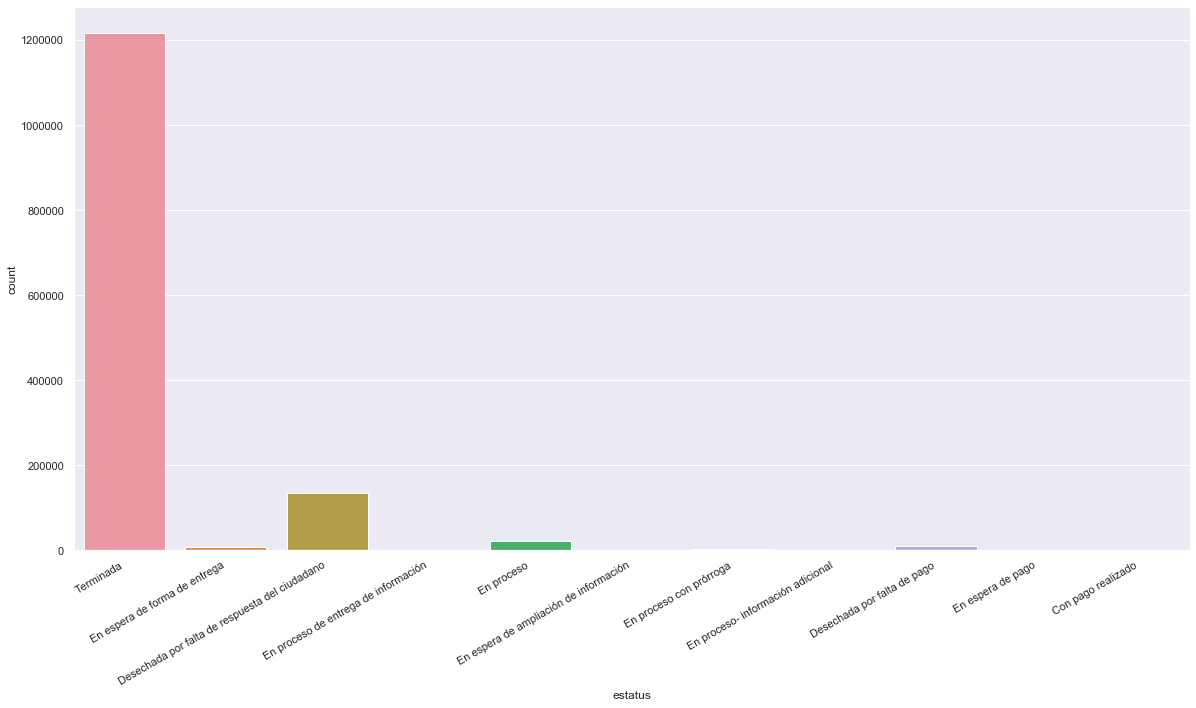

In [8]:
g = sns.countplot(inai.estatus)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

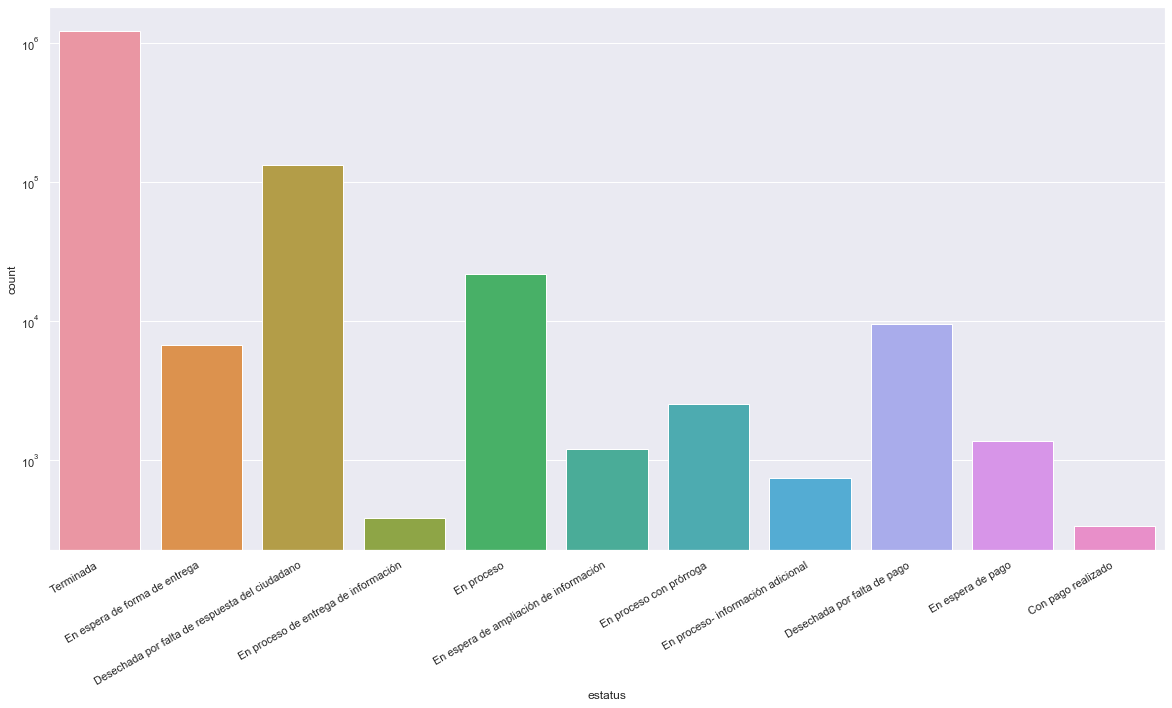

In [9]:
g = sns.countplot(inai.estatus)
g.set_yscale('log')
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `medio_entrada`

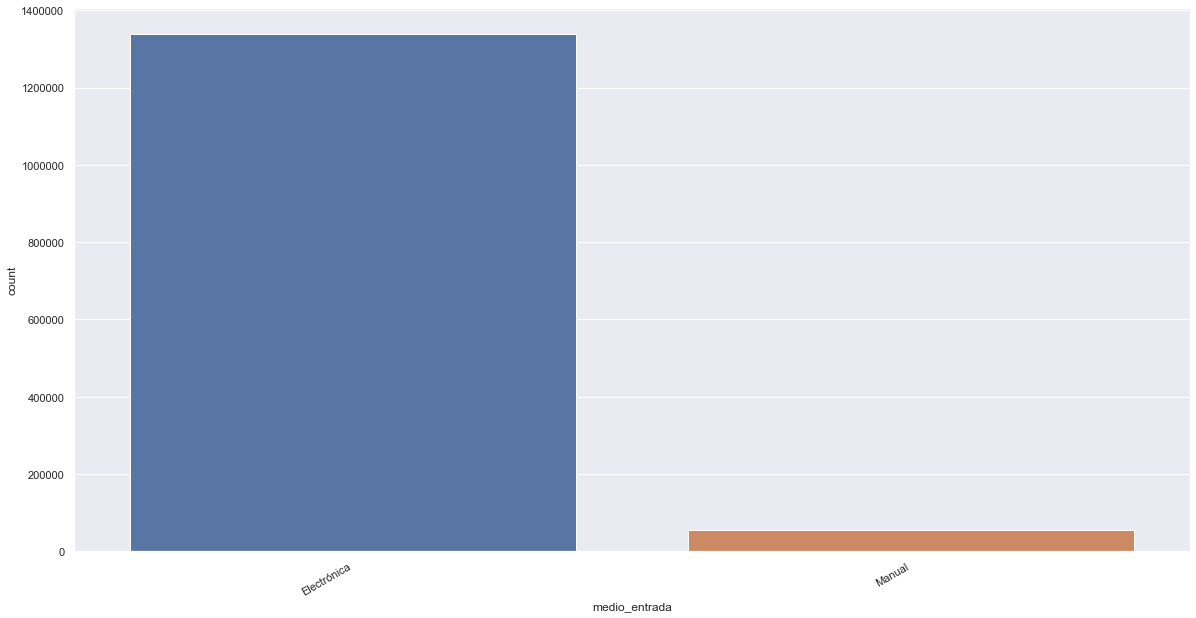

In [10]:
g = sns.countplot(inai.medio_entrada)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `tipo_solicitud`

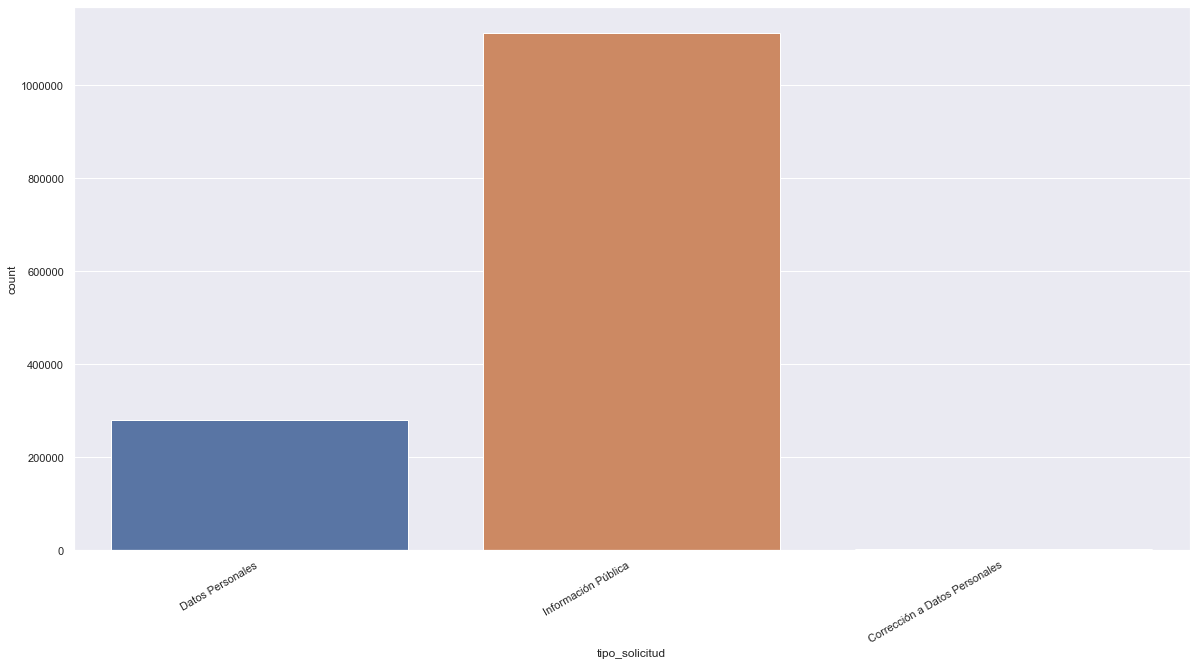

In [11]:
g = sns.countplot(inai.tipo_solicitud)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

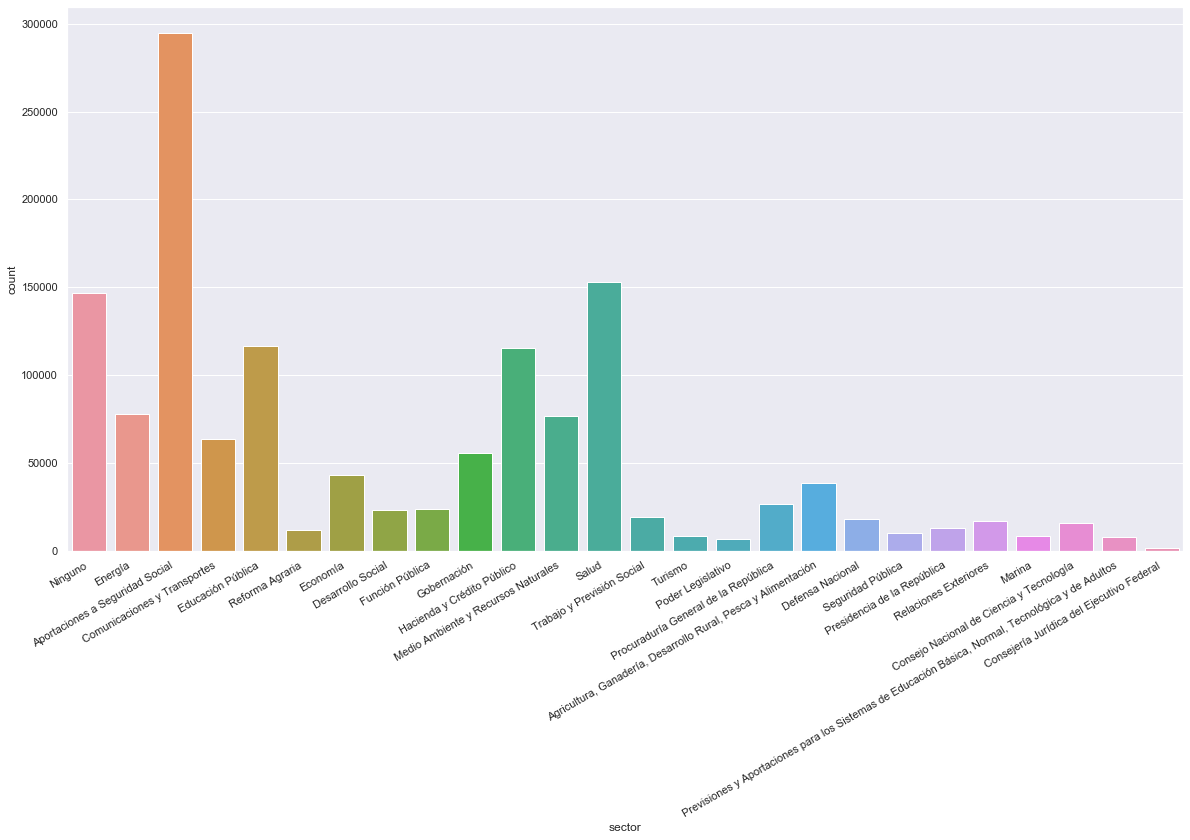

In [84]:
g = sns.countplot(inai.sector)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `descripción`

In [12]:
inai.descripcion.sample(5)

242121                                DESCRIPCIÓN SOLICITUD
341773    INFORMACION QUE RECOREGE PERSONALMENTE EN CUAN...
356740    gasto publico ejercido en educación básica  me...
79203                                 DESCRIPCIÓN SOLICITUD
761449                                DESCRIPCIÓN SOLICITUD
Name: descripcion, dtype: object

Es la solicitud. Textimnear.

### `otros`

In [13]:
inai.otros.sample(10)

752592                                                      
1230660                                          OTROS DATOS
1344340                                                  nan
1205732    Inmovilización de cuentas bancarias para garan...
356720                                           OTROS DATOS
1003507                                                  nan
328212                                                      
1325513                        MI CLAVE DE EMPLEADO FUE 3703
806609                        razones   negligencias médicas
191058                                                   nan
Name: otros, dtype: object

No vale la pena, muy *ad hoc*.

### `archivo_adjunto`

In [16]:
inai.loc[inai.archivo_adjunto!='nan', 'archivo_adjunto'].sample(10)

539256     https://www.infomex.org.mx/gobiernofederal/mod...
1368496    https://www.infomex.org.mx/gobiernofederal/mod...
298837                                     ADJUNTO SOLICITUD
501830     https://www.infomex.org.mx/gobiernofederal/mod...
841103     https://www.infomex.org.mx/gobiernofederal/mod...
741215                                     ADJUNTO SOLICITUD
644834                                     ADJUNTO SOLICITUD
122412                                     ADJUNTO SOLICITUD
971491                                     ADJUNTO SOLICITUD
1074105    https://www.infomex.org.mx/gobiernofederal/mod...
Name: archivo_adjunto, dtype: object

Adjuntos por el gobierno. En cualquier caso, si no son `nan` pueden ayudar a encontrar respuesta positiva o lo que signifique ADJUNTO SOLICITUD.

### `medio_entrega`

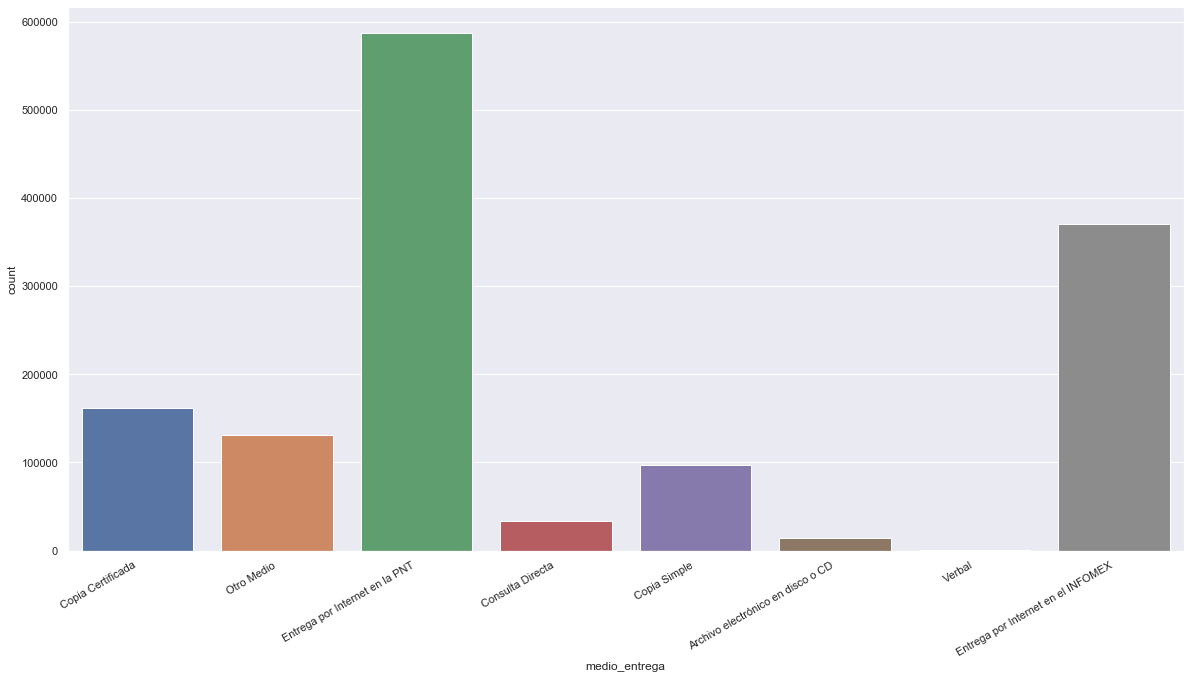

In [17]:
g = sns.countplot(inai.medio_entrega)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `respuesta`

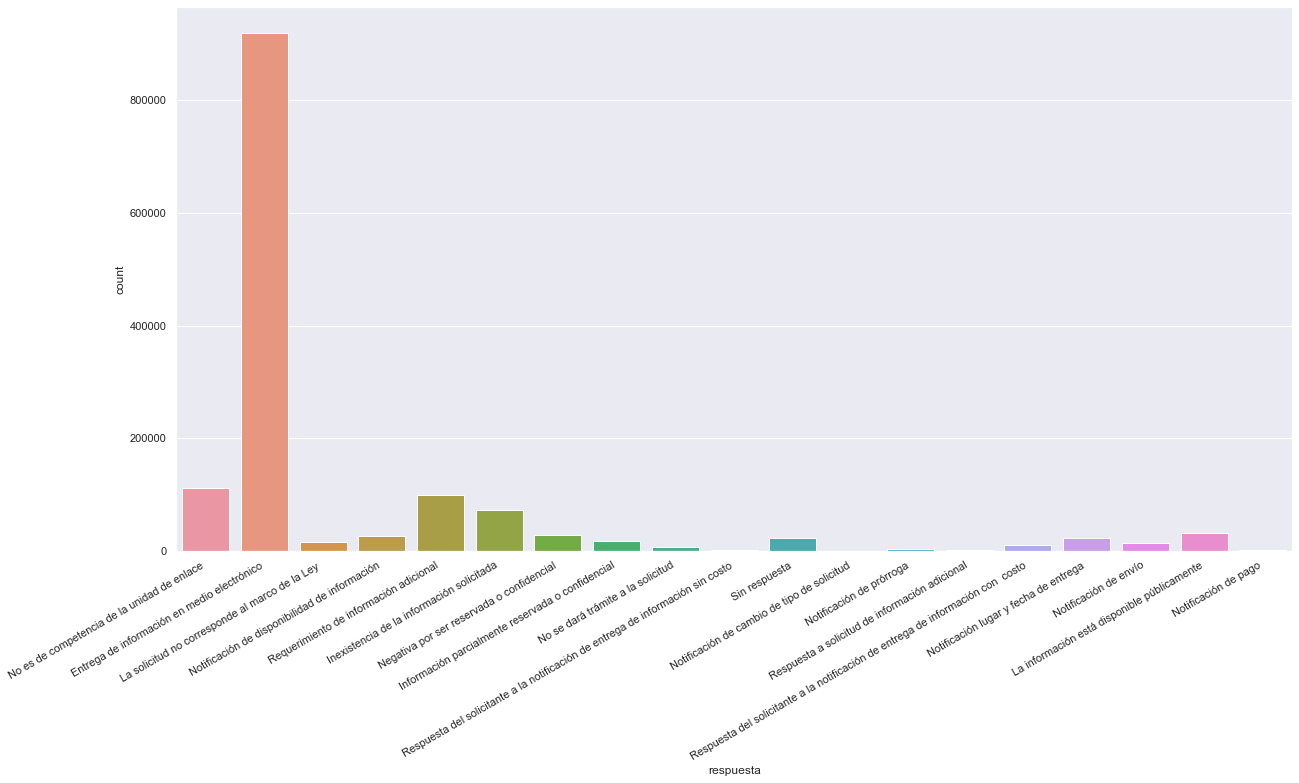

In [18]:
g = sns.countplot(inai.respuesta)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

[Text(0, 0, 'No es de competencia de la unidad de enlace'),
 Text(0, 0, 'Entrega de información en medio electrónico'),
 Text(0, 0, 'La solicitud no corresponde al marco de la Ley '),
 Text(0, 0, 'Notificación de disponibilidad de información'),
 Text(0, 0, 'Requerimiento de información adicional'),
 Text(0, 0, 'Inexistencia de la información solicitada'),
 Text(0, 0, 'Negativa por ser reservada o confidencial'),
 Text(0, 0, 'Información parcialmente reservada o confidencial'),
 Text(0, 0, 'No se dará trámite a la solicitud'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de entrega de información sin costo'),
 Text(0, 0, 'Sin respuesta'),
 Text(0, 0, 'Notificación de cambio de tipo de solicitud'),
 Text(0, 0, 'Notificación de prórroga'),
 Text(0, 0, 'Respuesta a solicitud de información adicional'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de entrega de información con  costo'),
 Text(0, 0, 'Notificación lugar y fecha de entrega'),
 Text(0, 0, 'Notificación 

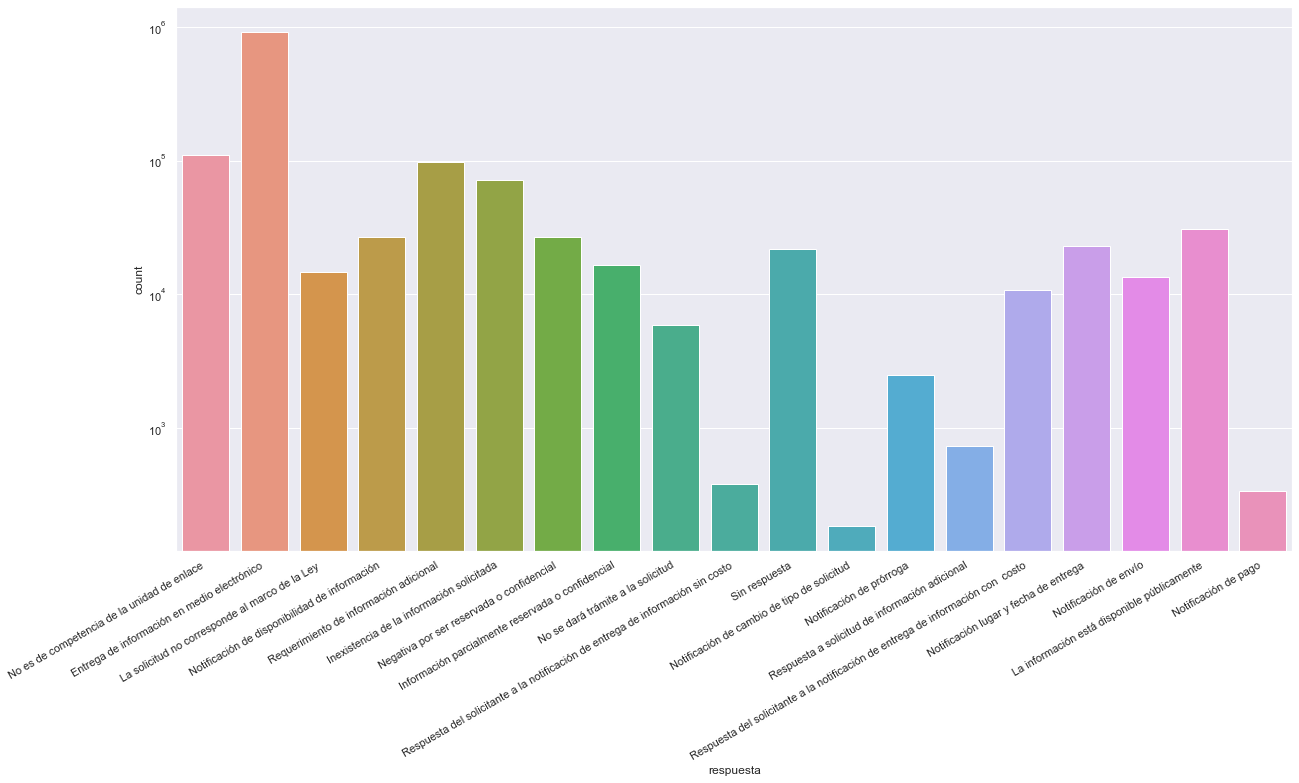

In [19]:
g = sns.countplot(inai.respuesta)
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

requerimiento de información adicional: la ciudadana no dio suficiente información para satisfacer el query.

respuesta del solic... : estos están en el proceso entre "ah, necesitamos esto de ti" y que se los de. Seguramente si no lo contesta, se va a deshechado por falta de pago en estatus.

###  `archivo_respuesta`

In [20]:
inai.loc[inai.archivo_respuesta=='nan', 'medio_entrega'].sample(10)

522355                             Otro Medio
714962                             Otro Medio
868251         Entrega por Internet en la PNT
1095442        Entrega por Internet en la PNT
881476         Entrega por Internet en la PNT
360705                           Copia Simple
393218     Entrega por Internet en el INFOMEX
1262801        Entrega por Internet en la PNT
916551         Entrega por Internet en la PNT
1280217    Entrega por Internet en el INFOMEX
Name: medio_entrega, dtype: object

## Un poquillo de tiempo

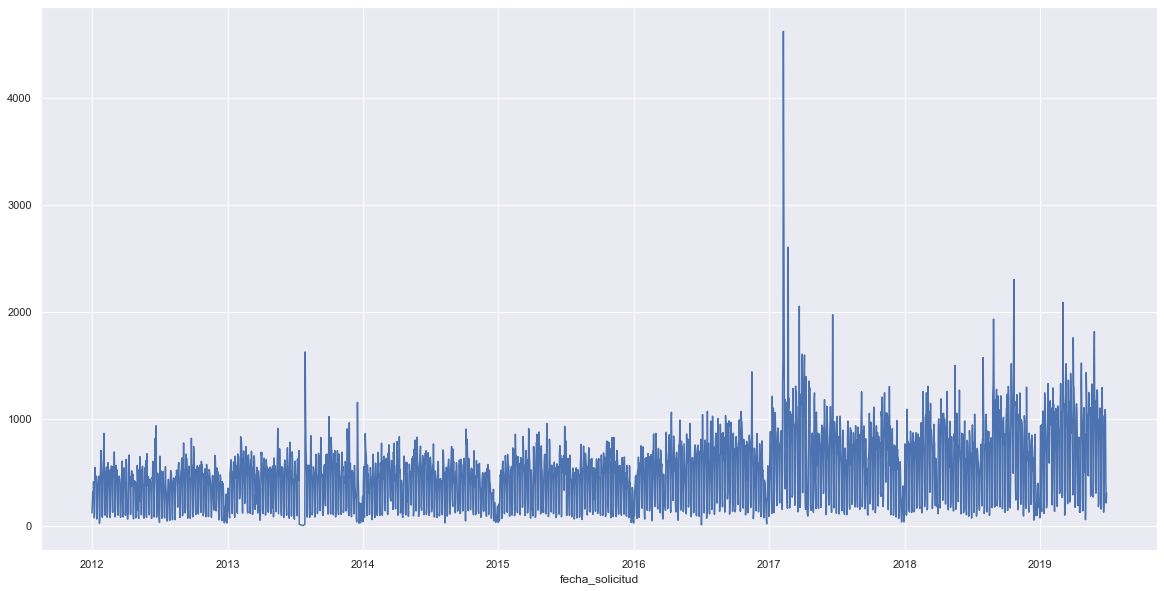

In [46]:
tseries = inai.groupby('fecha_solicitud').size()
sns.lineplot(tseries.index, tseries.values)

In [47]:
tseries[tseries.values > 3000]

fecha_solicitud
2017-02-08    4620
2017-02-09    3464
dtype: int64

In [20]:
inai['semana_solicitud'] = inai.fecha_solicitud.dt.week
inai['por_semana_sol'] = inai.año.astype(str) + '-' + inai.semana_solicitud.astype(str)
inai['mes_solicitud'] = inai.fecha_solicitud.dt.month
inai['por_mes_sol'] = inai.año.astype(str) + '-' + inai.mes_solicitud.astype(str)

In [67]:
todos_meses = []
for year in range(2012, 2020):
    y = str(year)
    for month in range(1, 13):
        m = str(month)
        todos_meses.append(y+'-'+m)

In [61]:
respuestas = inai.respuesta.unique()

In [62]:
from itertools import product

In [68]:
ii = pd.DataFrame(list(product(respuestas, todos_meses)))

In [71]:
ii.columns = ['respuesta', 'por_mes_sol']

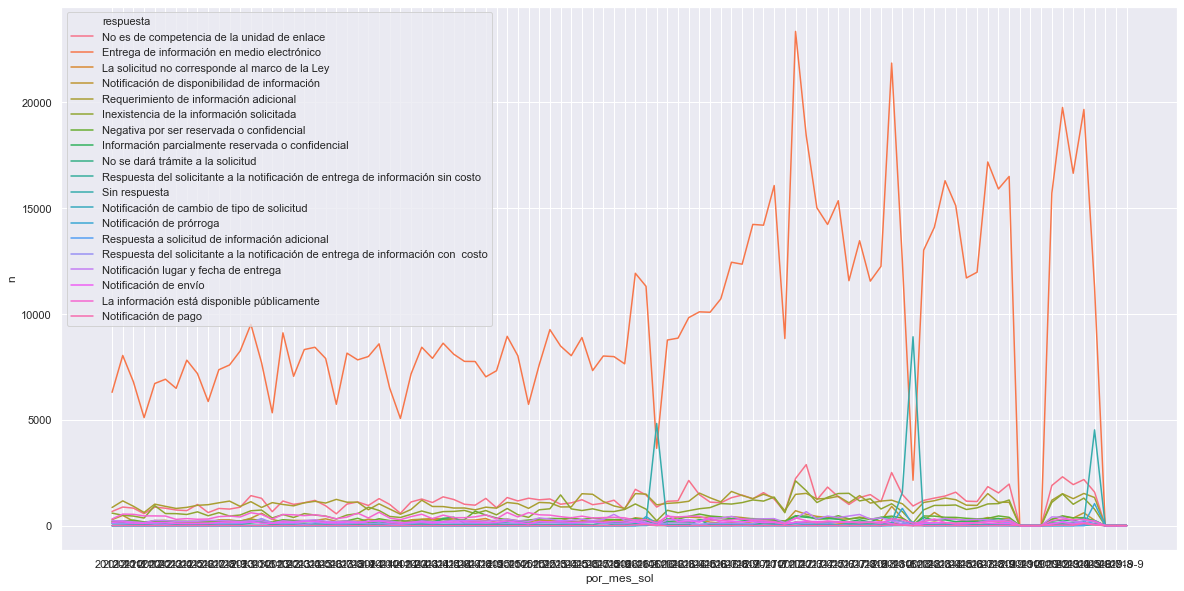

In [81]:
tseries = inai.groupby(['por_mes_sol', 'respuesta']).size().to_frame('n').reset_index()
tseries = ii.merge(tseries, how='left').fillna(0)
sns.lineplot(tseries.por_mes_sol, tseries.n, hue=tseries.respuesta)

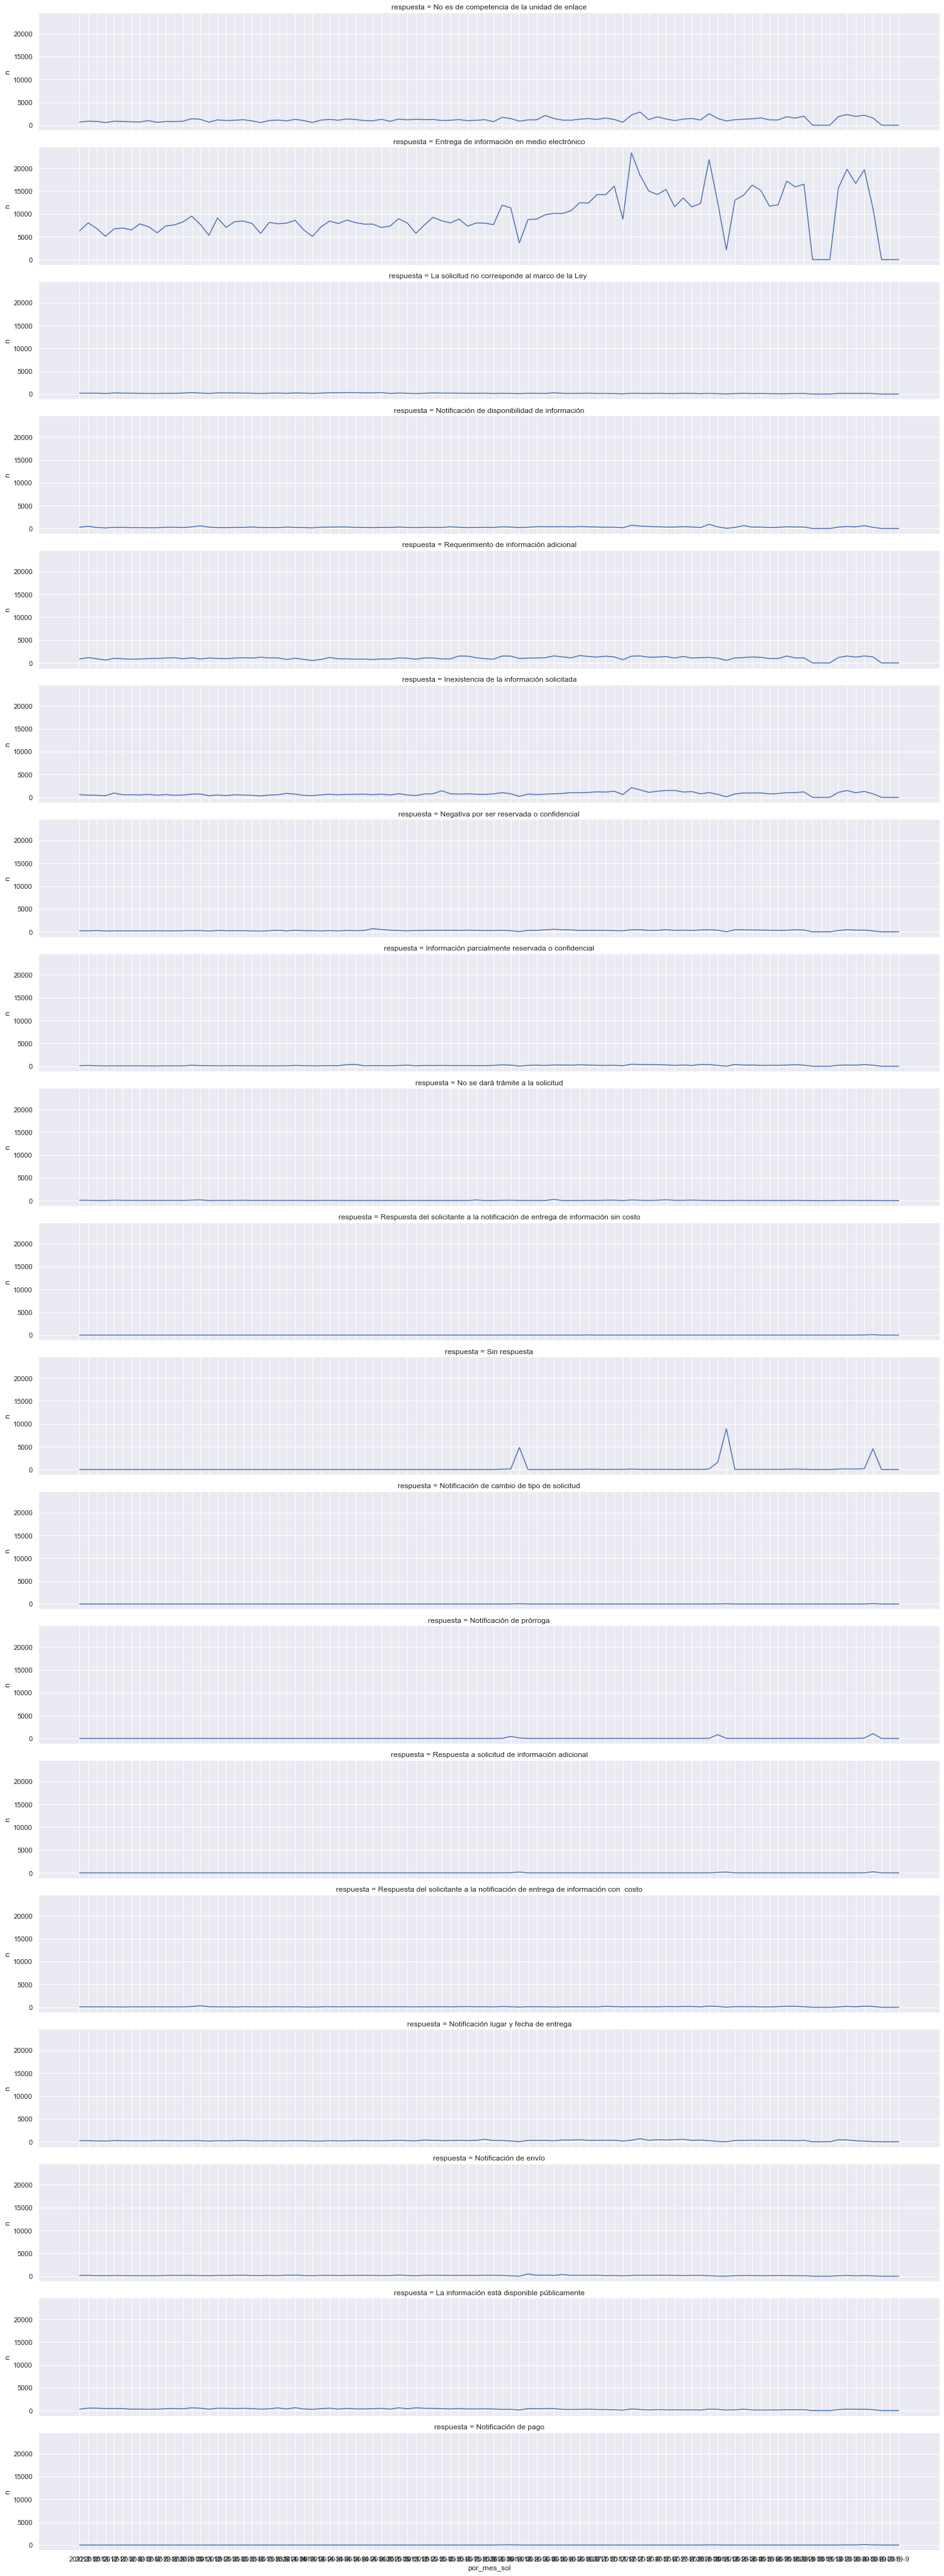

In [83]:
sns.relplot(x='por_mes_sol', y='n', 
            row='respuesta', 
            kind='line',
            height = 3,
            aspect = 7,
            data=tseries)

In [85]:
iii = pd.DataFrame(product(todos_meses, inai.sector.unique()))

In [87]:
iii.columns = ['todos-meses', 'sector']

In [93]:
tseries = inai.groupby(['por_mes_sol', 'sector']).size().to_frame('n').reset_index()
tseries = iii.merge(tseries, how='left')

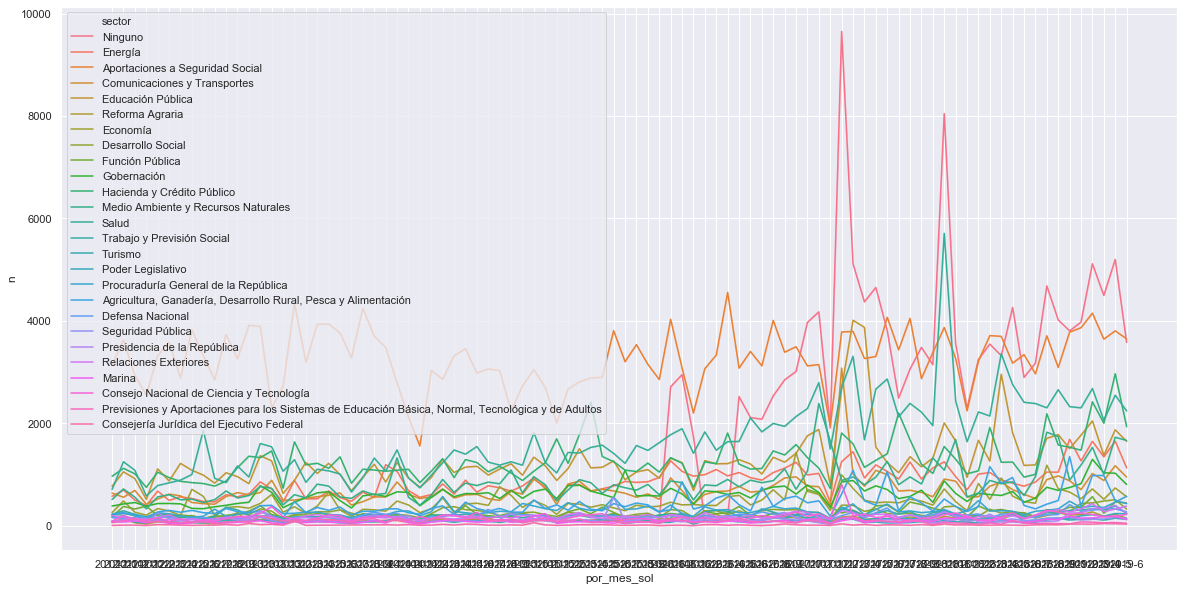

In [94]:
sns.lineplot(tseries.por_mes_sol, tseries.n, hue=tseries.sector)

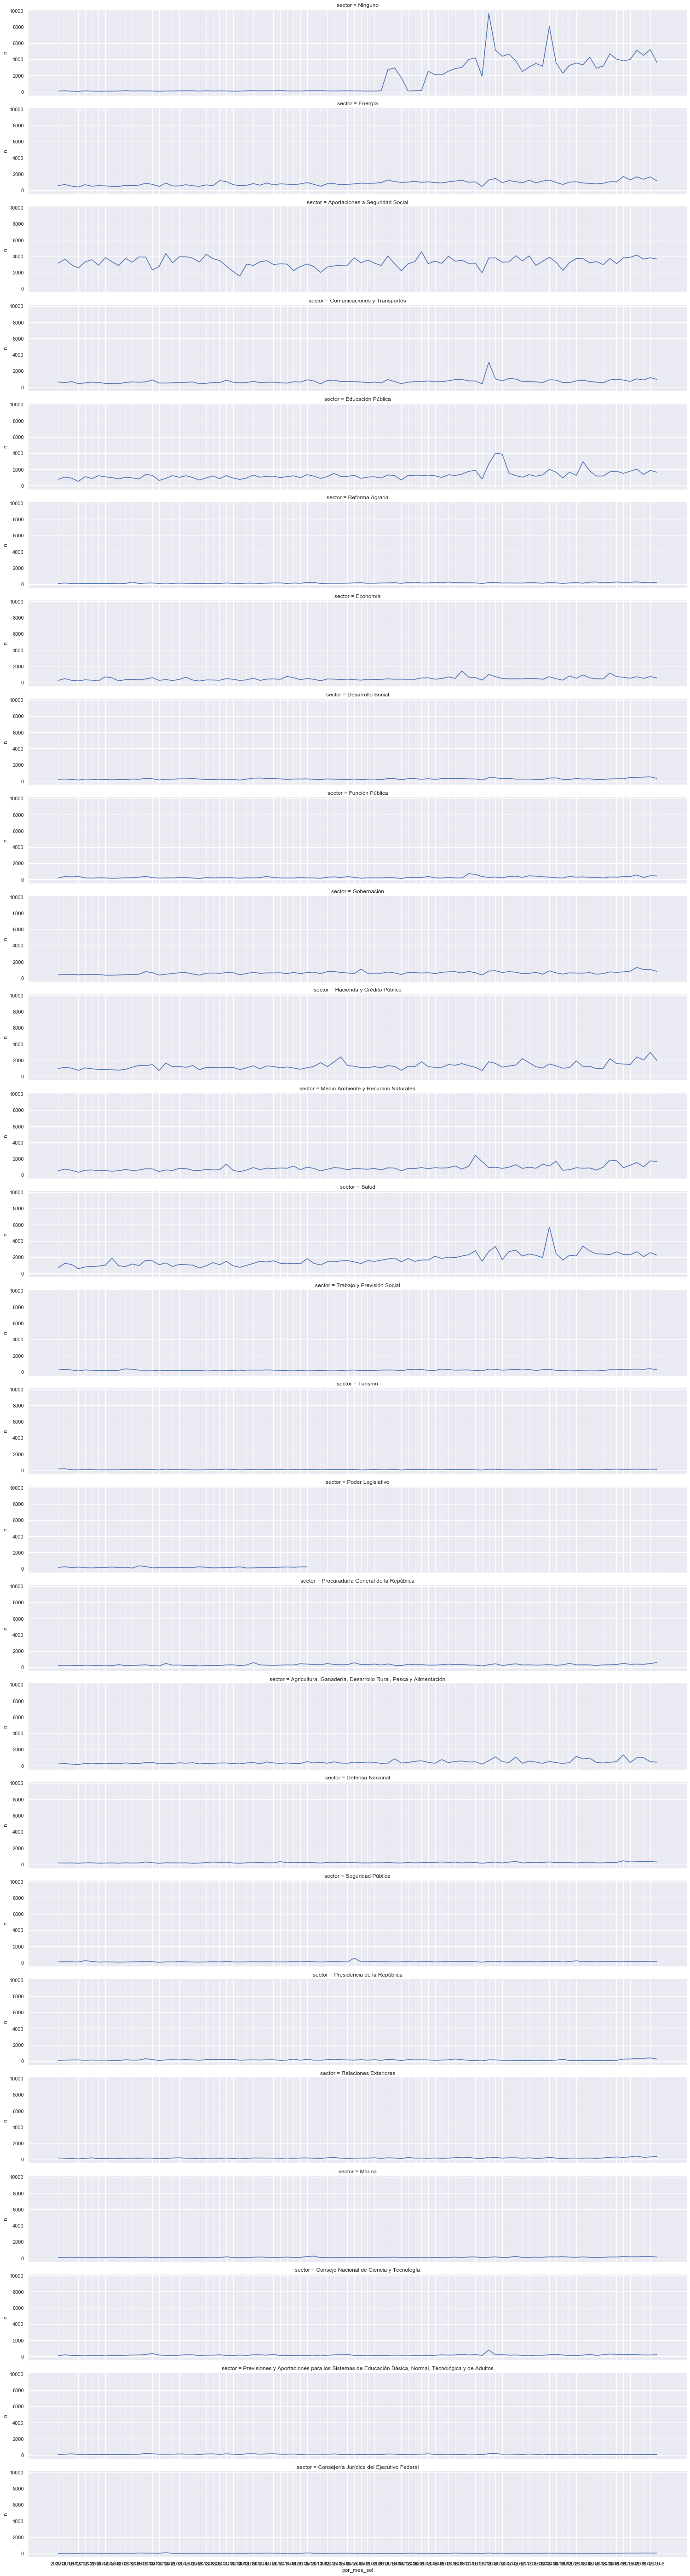

In [95]:
sns.relplot(x='por_mes_sol', y='n', 
            row='sector', 
            kind='line',
            height = 3,
            aspect = 7,
            data=tseries)

> Hacer análisis de punto de cambio.

## Eficiencia

In [5]:
inai.columns

Index(['folio', 'fecha_solicitud', 'estatus', 'medio_entrada',
       'tipo_solicitud', 'descripcion', 'otros', 'archivo_adjunto',
       'medio_entrega', 'fecha_limite', 'respuesta', 'texto_respuesta',
       'archivo_respuesta', 'fecha_respuesta', 'pais', 'estado', 'municipio',
       'codigo_postal', 'sector', 'año', 'clave_dependencia', 'dependencia'],
      dtype='object')

In [7]:
inai['tiempo_respuesta'] = (inai.fecha_respuesta - inai.fecha_solicitud).dt.days

## Tiempo de respuesta

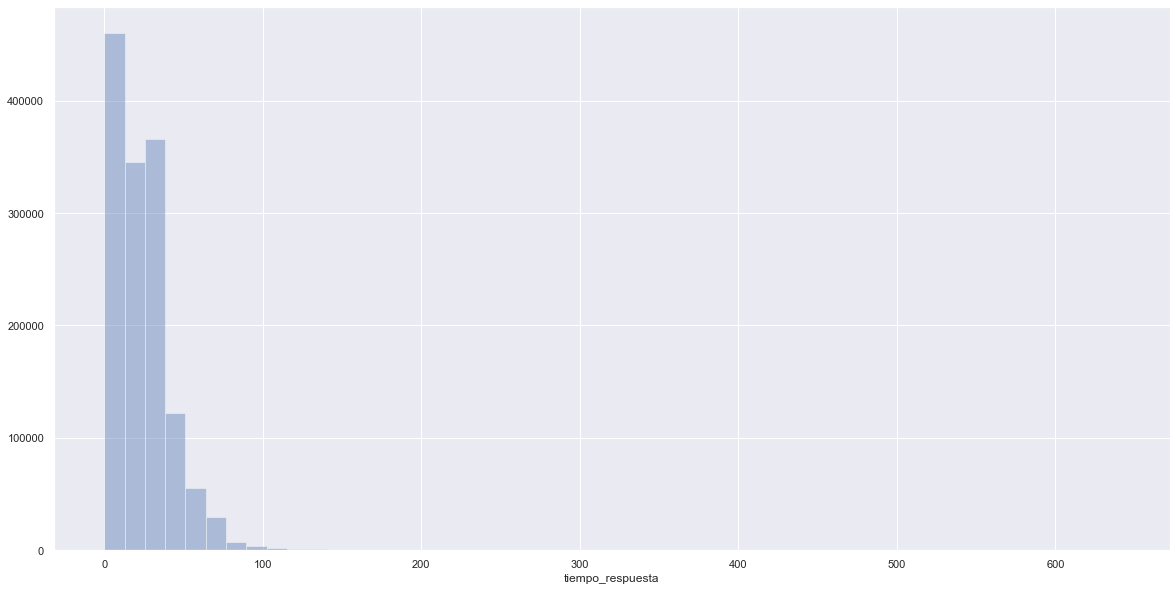

In [10]:
sns.distplot(inai.tiempo_respuesta, kde=False)

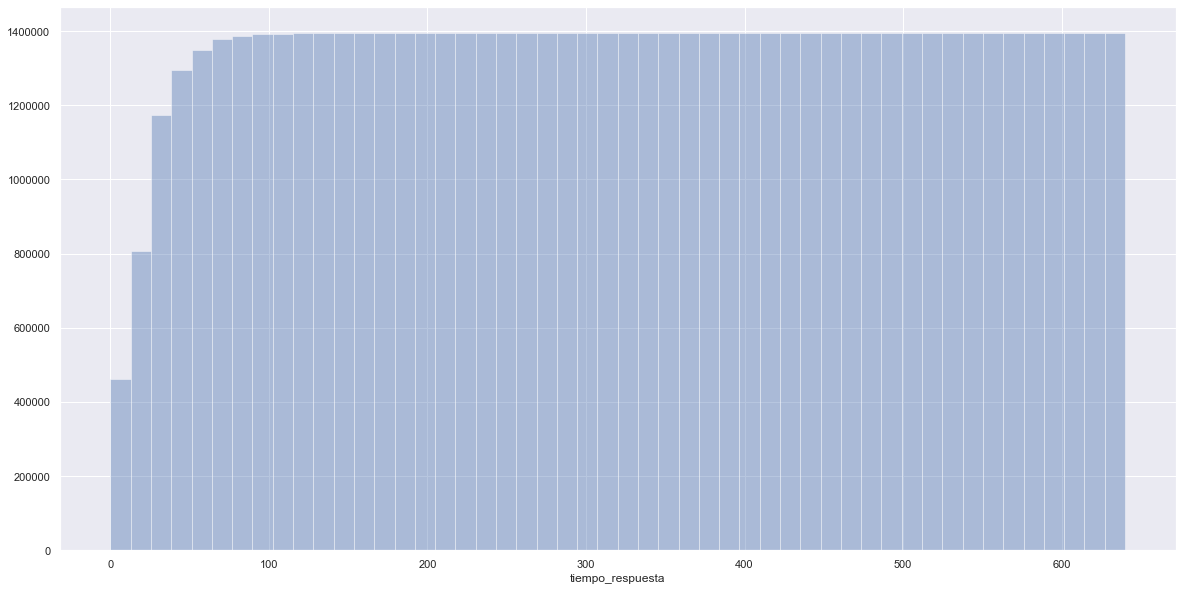

In [11]:
sns.distplot(inai.tiempo_respuesta, 
             kde=False,
             hist_kws={'cumulative':True})

In [12]:
inai.tiempo_respuesta.quantile(q=[0.95, 0.975, 0.99, 0.999])

0.950     57.0
0.975     68.0
0.990     79.0
0.999    141.0
Name: tiempo_respuesta, dtype: float64

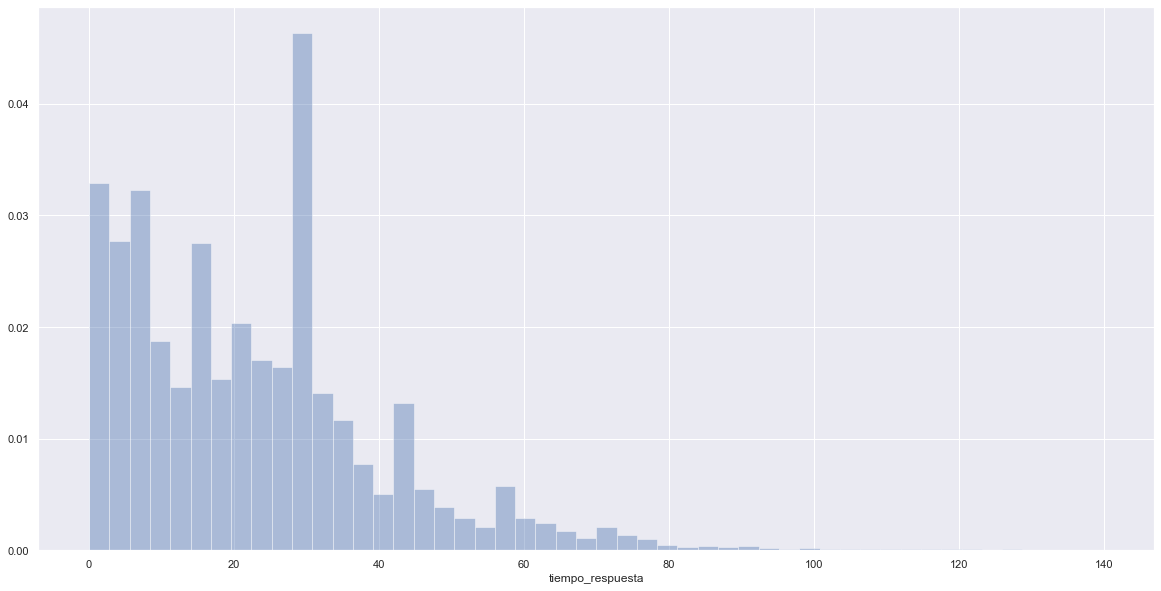

In [13]:
sns.distplot(inai.tiempo_respuesta[inai.tiempo_respuesta < 141], 
             kde=False, norm_hist=True)

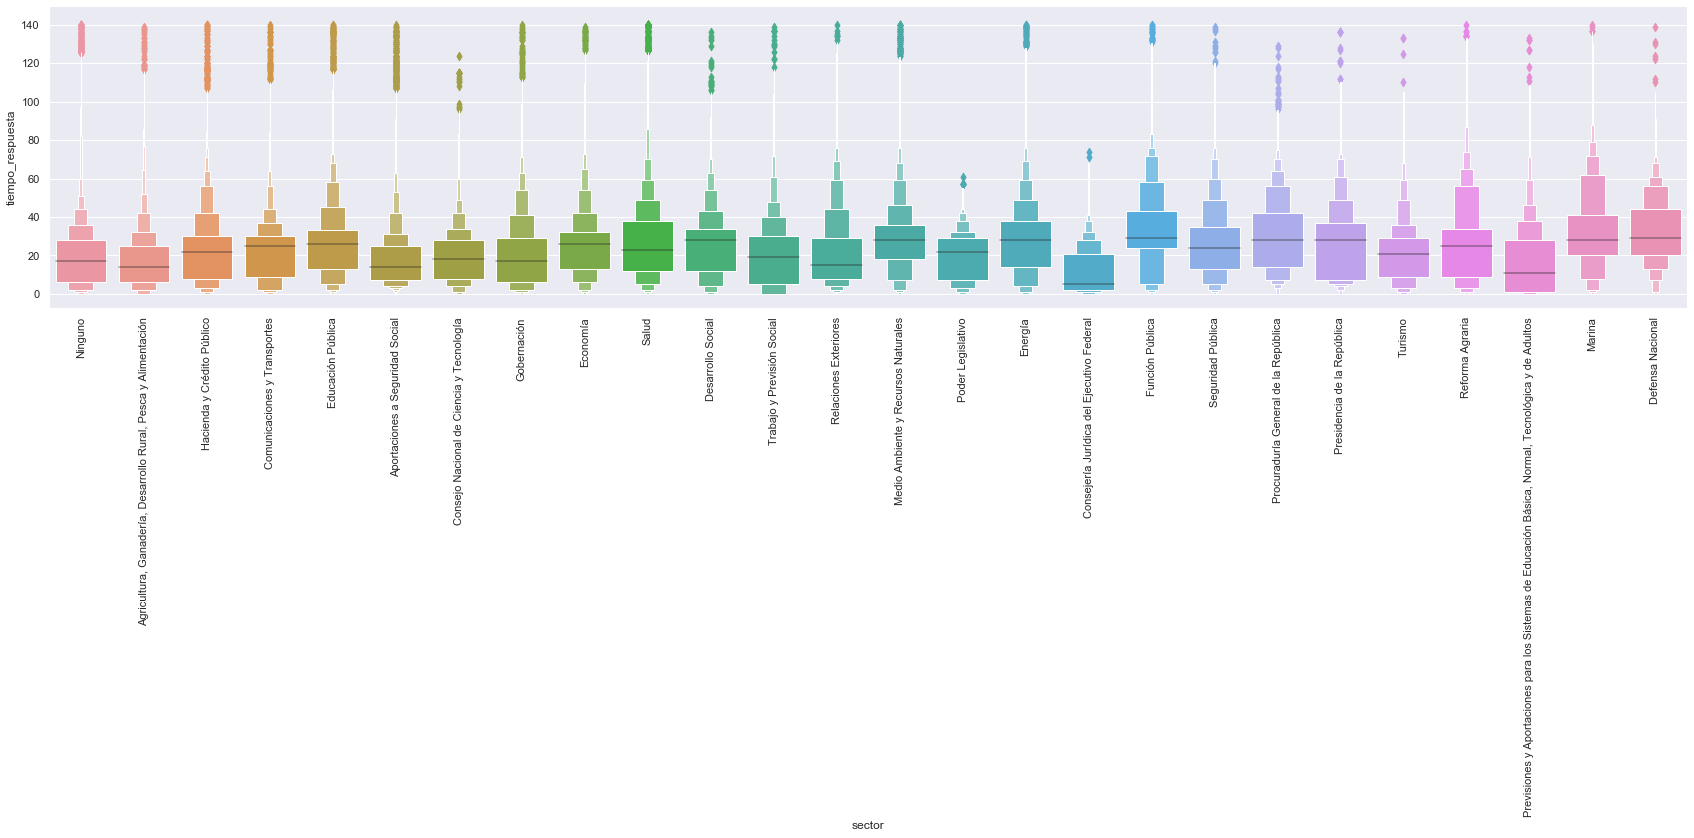

In [14]:
g = sns.catplot(y='tiempo_respuesta', x='sector',
            kind='boxen',
            aspect=5,
            data=inai[inai.tiempo_respuesta<141].sort_values('tiempo_respuesta'))
g = g.set_xticklabels(rotation=90)

In [17]:
inai.dtypes

folio                  int64
fecha_solicitud       object
estatus               object
medio_entrada         object
tipo_solicitud        object
descripcion           object
otros                 object
archivo_adjunto       object
medio_entrega         object
fecha_limite          object
respuesta             object
texto_respuesta       object
archivo_respuesta     object
fecha_respuesta       object
pais                  object
estado                object
municipio             object
codigo_postal        float64
sector                object
año                    int64
clave_dependencia     object
dependencia           object
tiempo_respuesta       int64
dtype: object

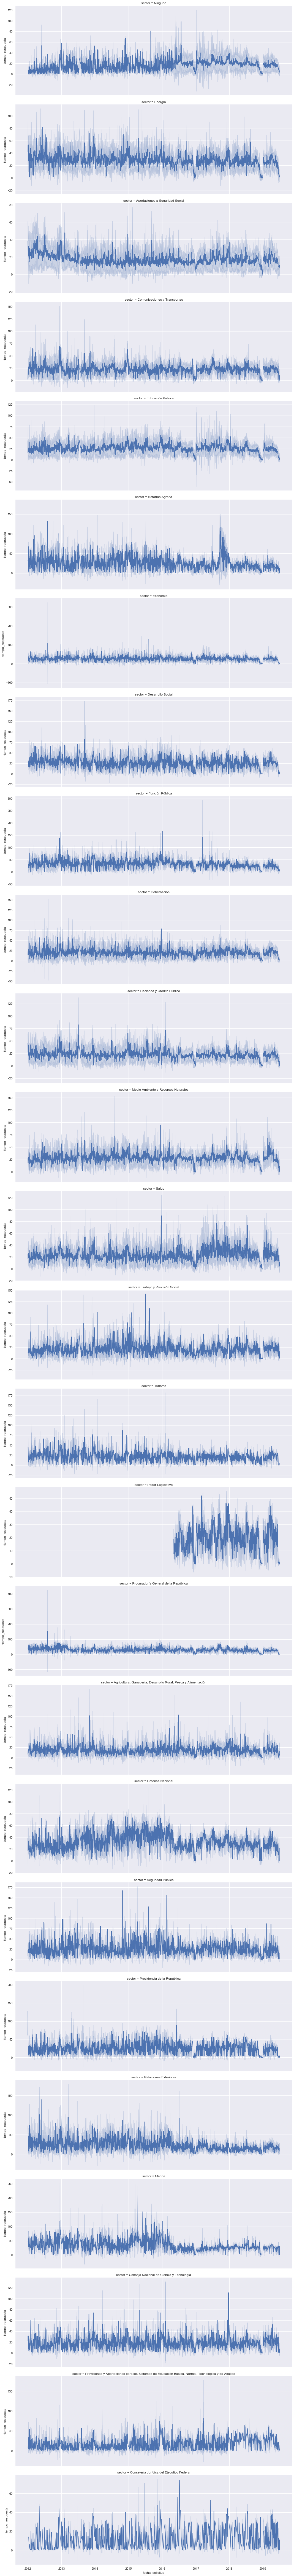

In [26]:
sns.relplot(x='fecha_solicitud', y='tiempo_respuesta', 
            row='sector',
            estimator='mean',
            ci='sd',
            kind='line',
            facet_kws={'sharey': False, 'sharex': True},
            aspect=3,
            data=inai)

En casi todos los sectores, el tiempo medio de respuesta va a la baja con respecto al inicio del año. En el último mes de 2018 hay muchos ceros. A ver qué dice calidad.

In [31]:
dic18 = inai[(pd.to_datetime(inai.fecha_solicitud).dt.year==2018) & (pd.to_datetime(inai.fecha_solicitud).dt.month==12)]

[Text(0, 0, 'Entrega de información en medio electrónico'),
 Text(0, 0, 'No es de competencia de la unidad de enlace'),
 Text(0, 0, 'Sin respuesta'),
 Text(0, 0, 'Requerimiento de información adicional'),
 Text(0, 0, 'Información parcialmente reservada o confidencial'),
 Text(0, 0, 'Notificación de cambio de tipo de solicitud'),
 Text(0, 0, 'Respuesta a solicitud de información adicional'),
 Text(0, 0, 'Inexistencia de la información solicitada'),
 Text(0, 0, 'Negativa por ser reservada o confidencial'),
 Text(0, 0, 'Notificación de disponibilidad de información'),
 Text(0, 0, 'Notificación de prórroga'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de entrega de información con  costo'),
 Text(0, 0, 'La información está disponible públicamente'),
 Text(0, 0, 'La solicitud no corresponde al marco de la Ley '),
 Text(0, 0, 'Notificación lugar y fecha de entrega'),
 Text(0, 0, 'No se dará trámite a la solicitud'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de en

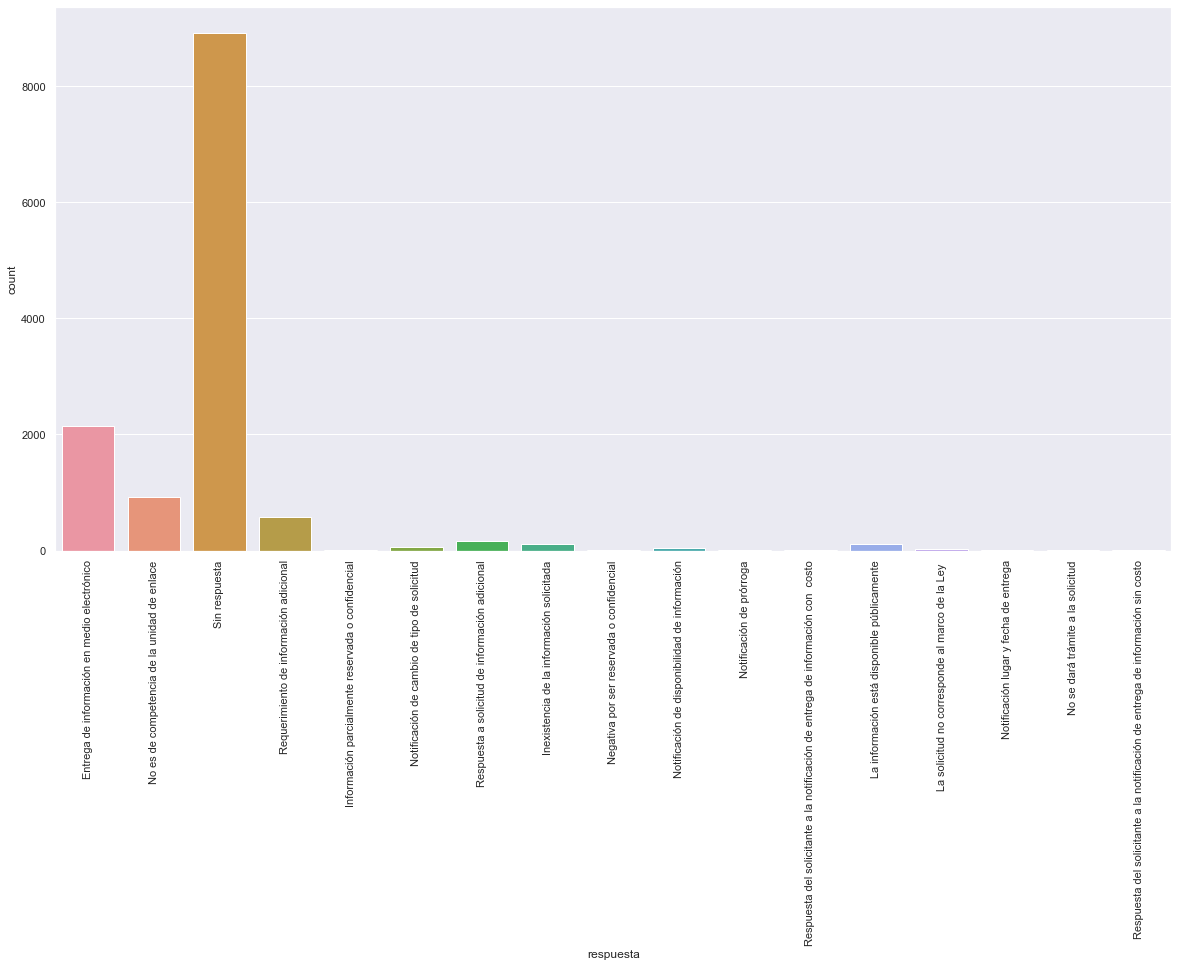

In [35]:
g = sns.countplot(dic18.respuesta)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Intentemos generalizar.

## Calidad de respuesta

In [48]:
inai.respuesta.unique().shape

(19,)

In [51]:
labels = inai.respuesta.unique().astype(str)
labels

array(['No es de competencia de la unidad de enlace',
       'Entrega de información en medio electrónico',
       'La solicitud no corresponde al marco de la Ley ',
       'Notificación de disponibilidad de información',
       'Requerimiento de información adicional',
       'Inexistencia de la información solicitada',
       'Negativa por ser reservada o confidencial',
       'Información parcialmente reservada o confidencial',
       'No se dará trámite a la solicitud',
       'Respuesta del solicitante a la notificación de entrega de información sin costo',
       'Sin respuesta', 'Notificación de cambio de tipo de solicitud',
       'Notificación de prórroga',
       'Respuesta a solicitud de información adicional',
       'Respuesta del solicitante a la notificación de entrega de información con  costo',
       'Notificación lugar y fecha de entrega', 'Notificación de envío',
       'La información está disponible públicamente',
       'Notificación de pago'], dtype='<U80')

In [56]:
categorias = [0, 1, 0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, 1, 1, 1, -1]
category_translation = dict(zip(labels, categorias))

In [58]:
inai['calidad_respuesta'] = inai.respuesta.map(category_translation)

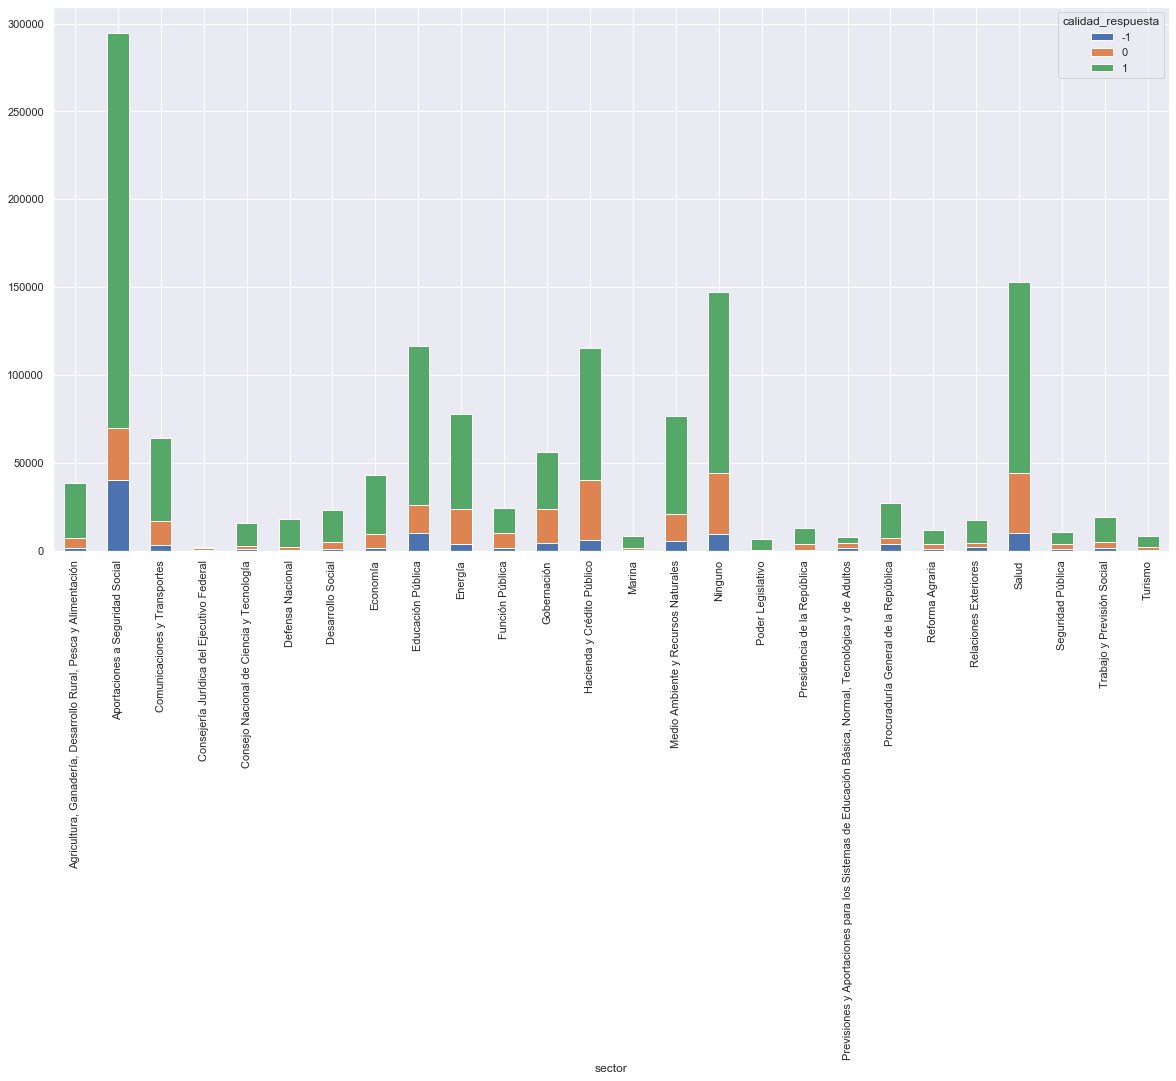

In [81]:
inai.groupby(['sector', 'calidad_respuesta']).size().unstack().plot(kind='bar', stacked=True)

In [108]:
g = (
    inai.assign(mes=lambda df: df.fecha_solicitud.astype(str).apply(lambda s: s[0:7]))
    .groupby(['mes', 'calidad_respuesta', 'sector'])
    .size()
    .to_frame('n')
    .reset_index(drop=False)
)

In [105]:
g['mes'] = g.fecha_solicitud.astype(str).apply(lambda s: s[0:7])

In [122]:
g = g.sort_values(['mes', 'sector', 'calidad_respuesta'])

In [135]:
g_todas_fechas = []
for year in range(2012, 2019):
    for month in range(1, 13):
        if month < 10:
            strm = '0'+str(month)
        else:
            strm = str(month)
        g_todas_fechas.append(str(year)+'-'+strm)
for month in range(1, 7):
    if month < 10:
        strm = '0'+str(month)
    else:
        strm = str(month)
    g_todas_fechas.append('2019-'+strm)
        

In [151]:
sectores = g.sector.unique()

In [152]:
ii = pd.DataFrame(list(product(g_todas_fechas, [-1, 0, 1], sectores)))
ii.columns = ['mes', 'calidad_respuesta', 'sector']

In [157]:
g = ii.merge(g, how='left').fillna(0).sort_values(['mes', 'sector', 'calidad_respuesta'])

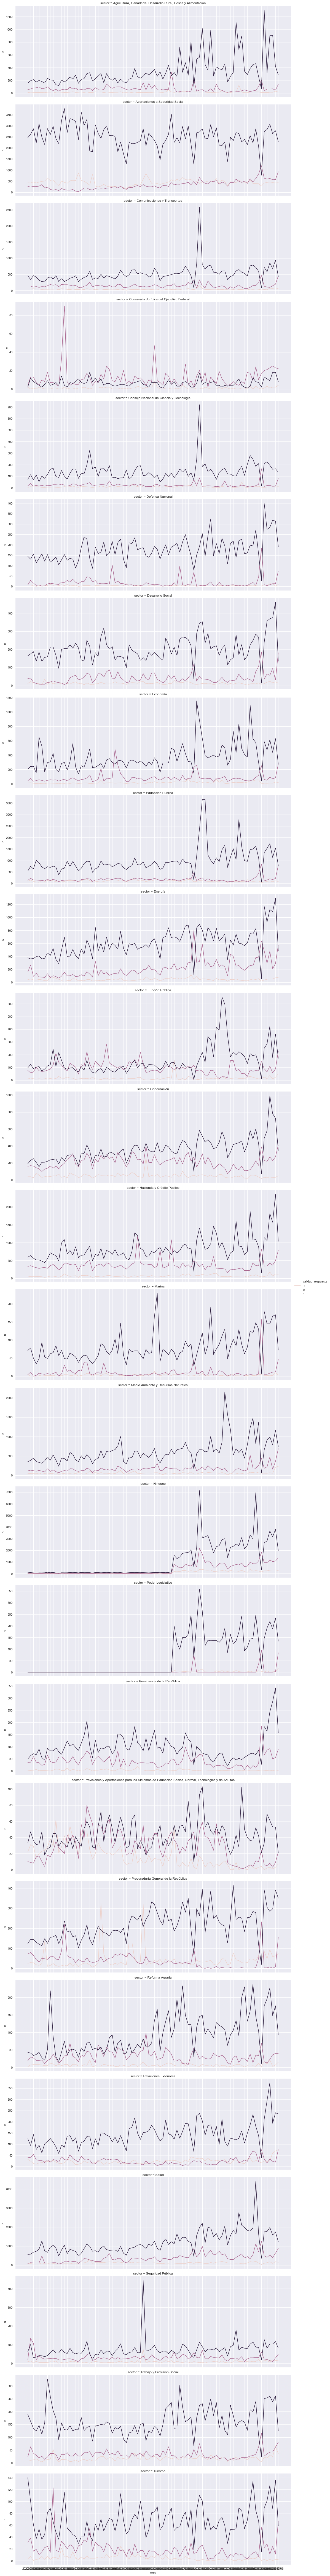

In [160]:
sns.relplot(x='mes',  y='n',
            row='sector', hue='calidad_respuesta',
            kind='line',
            aspect=3, 
            facet_kws={'sharey':False},
            data=g)